This notebook shows the basic functionality of 
1. creating an isometric tensor product state from a spin product state on a square lattice,
2. plotting the lattice,
3. moving around the orthogonality center and
4. computing local expectation values 

# 1. Initializing an isoTPS as a product state

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from src.isoTPS.square import isoTPS

In [2]:
# Create an isoTPS with a spin-1/2 at each site and initialize it in the "all up" state.
tps_all_up = isoTPS.isoTPS_Square(Ly=4, Lx=4, D_max=4, chi_factor=2)
tps_all_up.initialize_spinup()

In [3]:
# Create an isoTPS with a spin-1/2 at each site and initialize it in a product state, where the state of each spin can be set individually.
tps_custom_product_state = isoTPS.isoTPS_Square(Ly=2, Lx=2, D_max=4, chi_factor=2)

# We need to specify N = 2*Lx*Ly = 8 local states for the product state
product_state = [
    np.array([1, 0]),
    np.array([1, 0]),
    np.array([0, 1]),
    np.array([1, 1]) / np.sqrt(2),
    np.array([2, 1]) / np.sqrt(5),
    np.array([3, 1]) / np.sqrt(10),
    np.array([1, 0]),
    np.array([1, 0]),
]

# Initialize the isoTPS
tps_custom_product_state.initialize_product_state(product_state)

# 2. Plotting the lattice

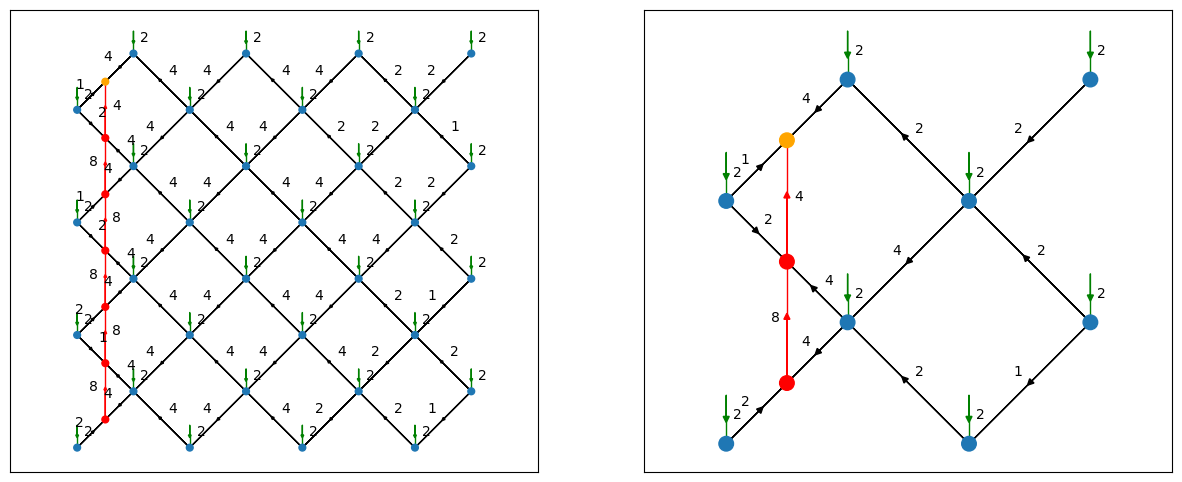

In [4]:
fig, axarray = plt.subplots(1, 2, figsize=(15, 6))
tps_all_up.plot(ax=axarray[0])
tps_custom_product_state.plot(ax=axarray[1])
plt.show()

# 3. Moving around the orthogonality center

### Moving the orthogonality center up and down

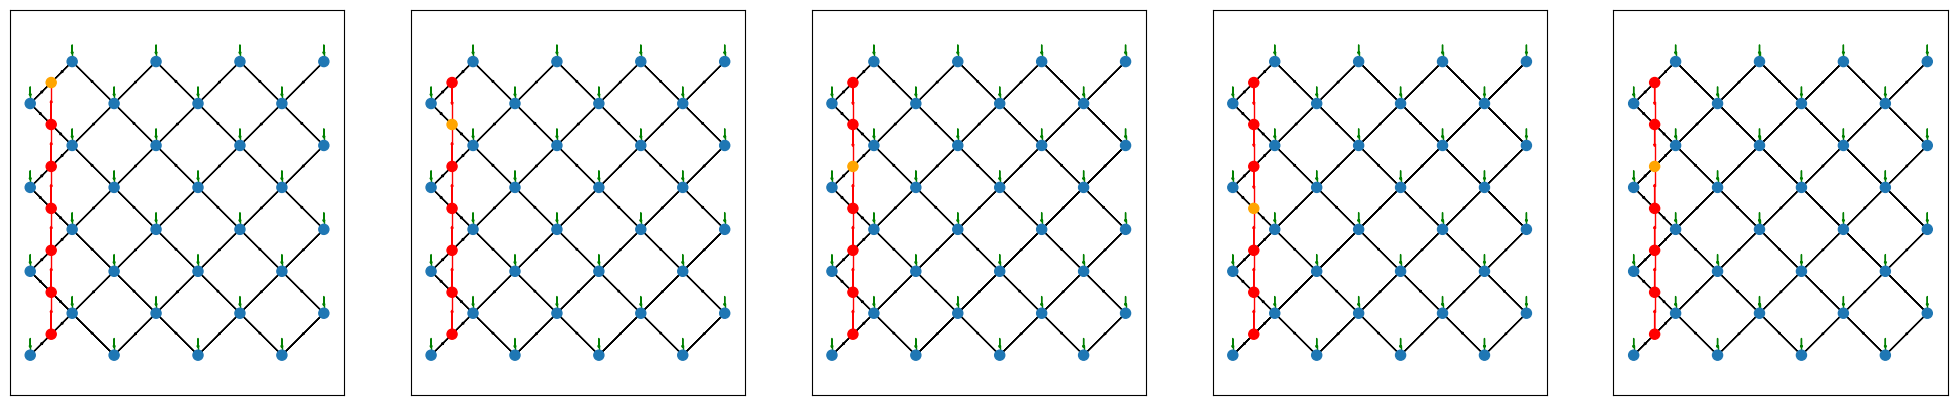

In [5]:
fig, axarray = plt.subplots(1, 5, figsize=(25, 5))

# We move the orthogonality center down 3 times and up one time. After each move we plot the isoTPS.
tps_all_up.plot(ax=axarray[0], show_bond_dims=False, T_tensor_scale=2.0, W_tensor_scale=2.0)
tps_all_up.move_ortho_center_down()
tps_all_up.plot(ax=axarray[1], show_bond_dims=False, T_tensor_scale=2.0, W_tensor_scale=2.0)
tps_all_up.move_ortho_center_down()
tps_all_up.plot(ax=axarray[2], show_bond_dims=False, T_tensor_scale=2.0, W_tensor_scale=2.0)
tps_all_up.move_ortho_center_down()
tps_all_up.plot(ax=axarray[3], show_bond_dims=False, T_tensor_scale=2.0, W_tensor_scale=2.0)
tps_all_up.move_ortho_center_up()
tps_all_up.plot(ax=axarray[4], show_bond_dims=False, T_tensor_scale=2.0, W_tensor_scale=2.0)

plt.show()

### Moving the orthogonality surface left and right

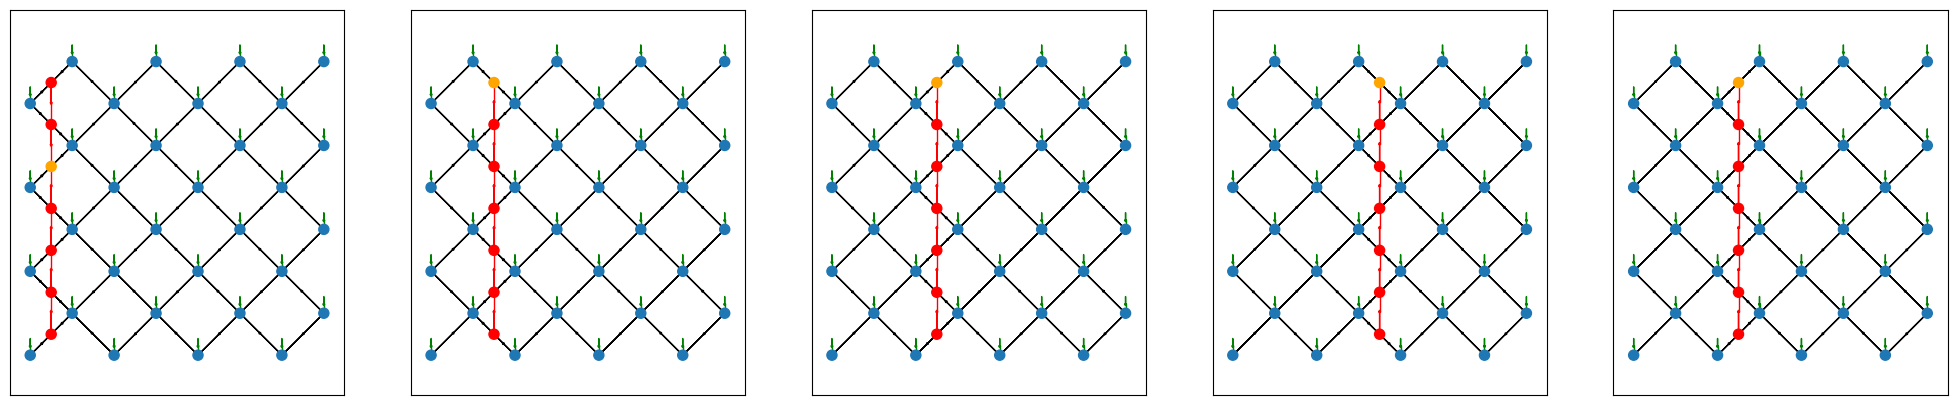

In [6]:
fig, axarray = plt.subplots(1, 5, figsize=(25, 5))

# We move the orthogonality center right 3 times and left one time. After each move we plot the isoTPS.
tps_all_up.plot(ax=axarray[0], show_bond_dims=False, T_tensor_scale=2.0, W_tensor_scale=2.0)
tps_all_up.move_ortho_surface_right()
tps_all_up.plot(ax=axarray[1], show_bond_dims=False, T_tensor_scale=2.0, W_tensor_scale=2.0)
tps_all_up.move_ortho_surface_right()
tps_all_up.plot(ax=axarray[2], show_bond_dims=False, T_tensor_scale=2.0, W_tensor_scale=2.0)
tps_all_up.move_ortho_surface_right()
tps_all_up.plot(ax=axarray[3], show_bond_dims=False, T_tensor_scale=2.0, W_tensor_scale=2.0)
tps_all_up.move_ortho_surface_left()
tps_all_up.plot(ax=axarray[4], show_bond_dims=False, T_tensor_scale=2.0, W_tensor_scale=2.0)

plt.show()

# 4. Computing local expectation values

In [7]:
# We want to compute the expectation value <\sigma^z_i> at each lattice site i.
sigma_z = np.array([[1.0, 0.0], [0.0, -1.0]])

# Compute expectation values of the "all up" isoTPS. We expect all expectation values to be equal to 1.0.
exp_vals_all_up = tps_all_up.compute_expectation_values_onesite([sigma_z])
assert(np.allclose(exp_vals_all_up, 1.0))

# Compute expectation values of the custom product state isoTPS.
expected_result = [1.0, 1.0, -1.0, 0.0, 0.6, 0.8, 1.0, 1.0]
exp_vals_custom_product_state = tps_custom_product_state.compute_expectation_values_onesite([sigma_z])
assert(np.allclose(exp_vals_custom_product_state, expected_result))